# **CASE STUDY 1**

# **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [2]:
data = pd.read_csv("train_loan.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset contains 614 instances and 13 features, where 8 are categorical and 5 are numerical features. Loan_Status is the dependent feature and all other columns are the independent featuers.

# **Data Preprocessing**

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## **Numerical Data**

In [7]:
numerical_columns = list(data._get_numeric_data().columns)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### **Handling Missing Values**

In [8]:
data[numerical_columns].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# setting the plotting style as 'seaborn'
plt.style.use("seaborn")

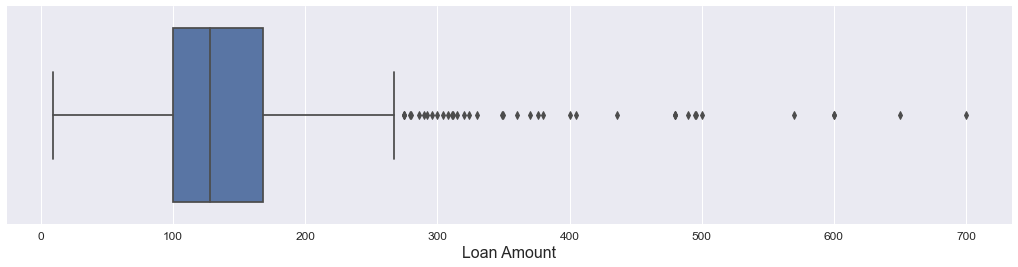

In [11]:
# LoanAmount 
plt.figure(figsize=(18,4))
sns.boxplot(x=data['LoanAmount'])
plt.xticks(fontsize=12)
plt.xlabel("Loan Amount", fontsize=16)
plt.show()

Since the feature contains outliers, median will be used to fill the missing values.

In [12]:
data['LoanAmount'].median()

128.0

In [13]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

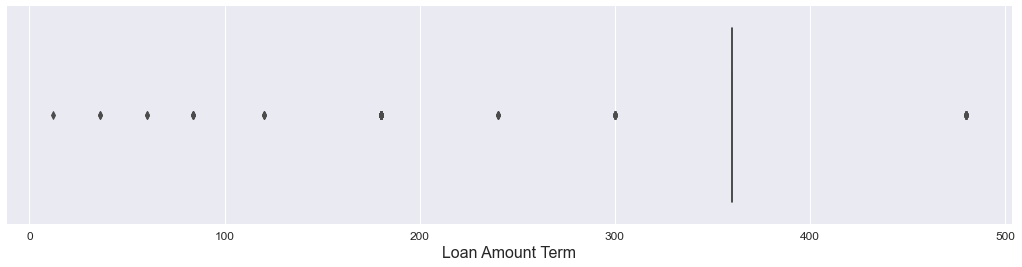

In [14]:
# Loan_Amount_Term 
plt.figure(figsize=(18,4))
sns.boxplot(x=data['Loan_Amount_Term'])
plt.xticks(fontsize=12)
plt.xlabel("Loan Amount Term", fontsize=16)
plt.show()

In [15]:
data['Loan_Amount_Term'].value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Here we can use mode to fill the missing values.

In [16]:
data['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [17]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

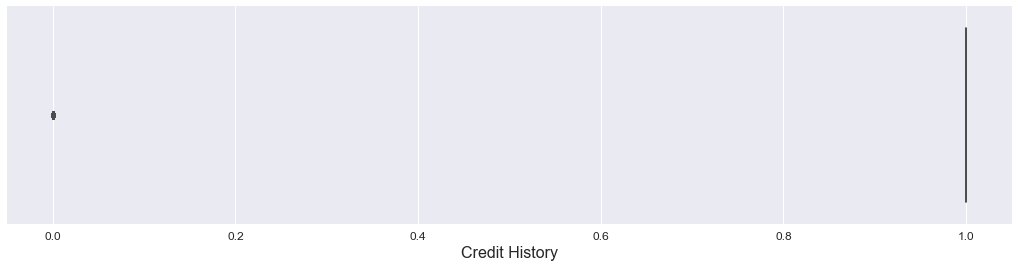

In [18]:
# Credit_History 
plt.figure(figsize=(18,4))
sns.boxplot(x=data['Credit_History'])
plt.xticks(fontsize=12)
plt.xlabel("Credit History", fontsize=16)
plt.show()

In [19]:
data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

Here also we can use mode to fill the missing values.

In [20]:
data['Credit_History'].fillna(1.0, inplace=True)

In [21]:
data[numerical_columns].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

## **Categorical Data**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
categorical_columns = list(data.select_dtypes('object'))
categorical_columns.remove('Loan_Status')
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [24]:
data[categorical_columns].isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [25]:
data.describe(exclude=np.number)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Gender, Married, Dependents, Self_Employed columns has missing values.
We can drop the Loan_ID column as it contain unique values which does not contribute to the model prediction.

In [26]:
data.drop("Loan_ID", axis=1, inplace=True)

In [27]:
data['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [28]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [29]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [30]:
data['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [31]:
data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [32]:
data['Married'].fillna(data['Married'].mode()[0], inplace=True)

In [33]:
data['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [34]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [36]:
# removing the + symbol from the values
data['Dependents'] = data['Dependents'].str.rstrip("+").astype(int)

In [42]:
data['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [43]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

In [44]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Outlier Handling**

In [45]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


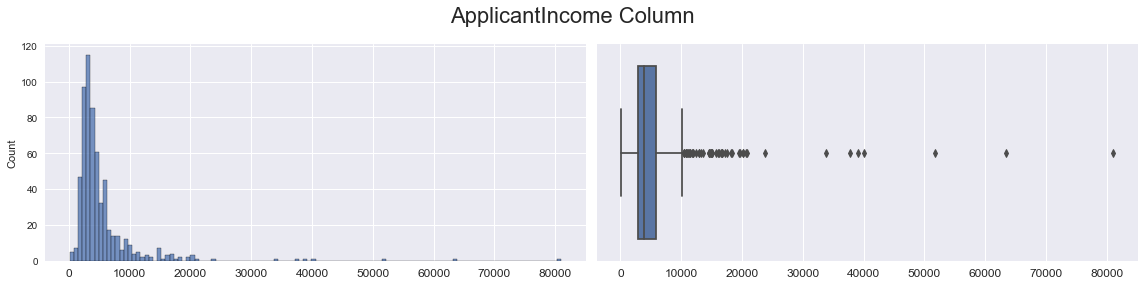

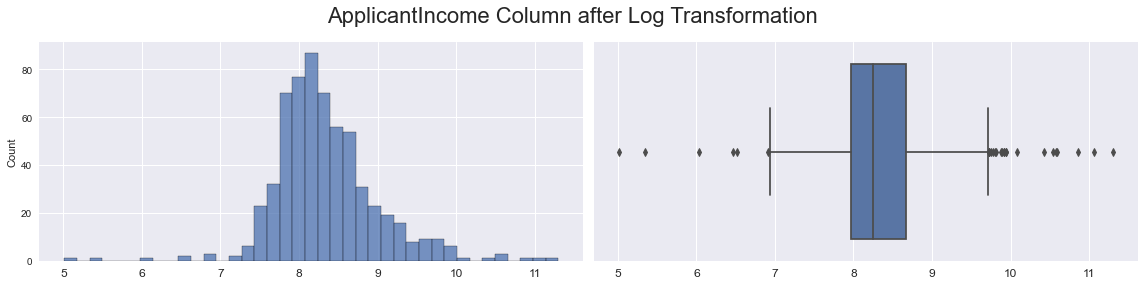

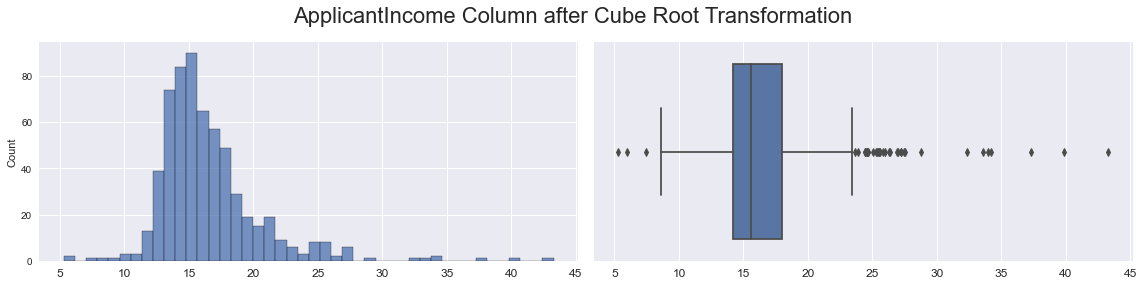

In [127]:
# ApplicantIncome 
col = 'ApplicantIncome'
plt.figure(figsize=(16,4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column", fontsize=22)
plt.tight_layout()
plt.show()


# log transformation
plt.figure(figsize=(16,4))
log_applicantIncome = np.log(data[col])

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=log_applicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=log_applicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column after Log Transformation", fontsize=22)
plt.tight_layout()
plt.show()


# cube root transformation
plt.figure(figsize=(16,4))
cube_root_applicantIncome = (data[col]) ** (1/3)

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=cube_root_applicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=cube_root_applicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column after Cube Root Transformation", fontsize=22)
plt.tight_layout()
plt.show()

The log tranformation can be used to handle the outlier values in ApplicantIncome column

In [129]:
data['ApplicantIncome'] = log_applicantIncome
data['ApplicantIncome']

0      8.674026
1      8.430109
2      8.006368
3      7.856707
4      8.699515
         ...   
609    7.972466
610    8.320205
611    8.996157
612    8.933664
613    8.430109
Name: ApplicantIncome, Length: 614, dtype: float64

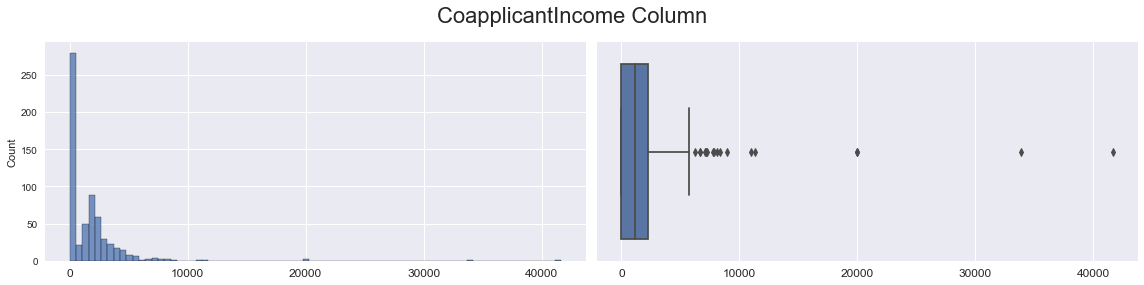

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


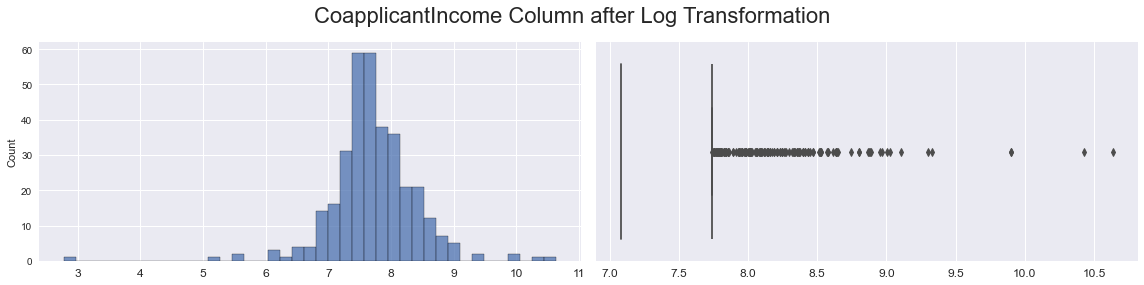

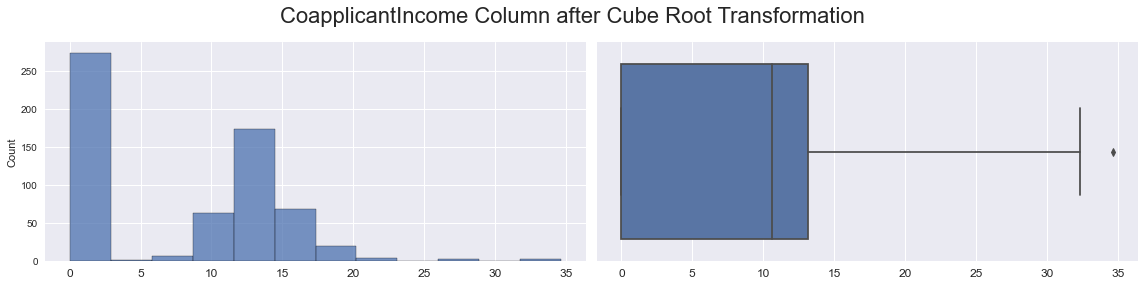

In [136]:
# CoapplicantIncome
col = 'CoapplicantIncome'
plt.figure(figsize=(16,4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column", fontsize=22)
plt.tight_layout()
plt.show()


# log transformation
plt.figure(figsize=(16,4))
log_coapplicantIncome = np.log(data[col])

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=log_coapplicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=log_coapplicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column after Log Transformation", fontsize=22)
plt.tight_layout()
plt.show()


# cube root transformation
plt.figure(figsize=(16,4))
cube_root_coapplicantIncome = (data[col]) ** (1/3)

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=cube_root_coapplicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=cube_root_coapplicantIncome)
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column after Cube Root Transformation", fontsize=22)
plt.tight_layout()
plt.show()

In [ ]:
len(data['CoapplicantIncome'] == 0)

614

614 of the values are 0, so Log transformation cannot be applied. 

Cube tranformation can be used here to handle the outliers.

In [137]:
data['CoapplicantIncome'] = cube_root_coapplicantIncome
data['CoapplicantIncome']

0       0.000000
1      11.467457
2       0.000000
3      13.310098
4       0.000000
         ...    
609     0.000000
610     0.000000
611     6.214465
612     0.000000
613     0.000000
Name: CoapplicantIncome, Length: 614, dtype: float64

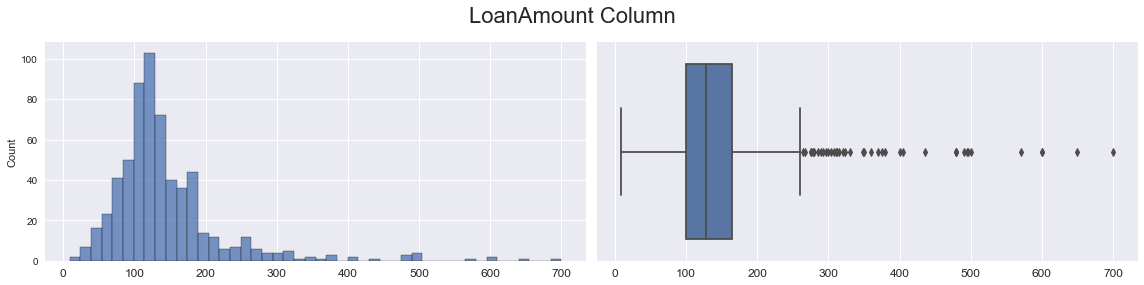

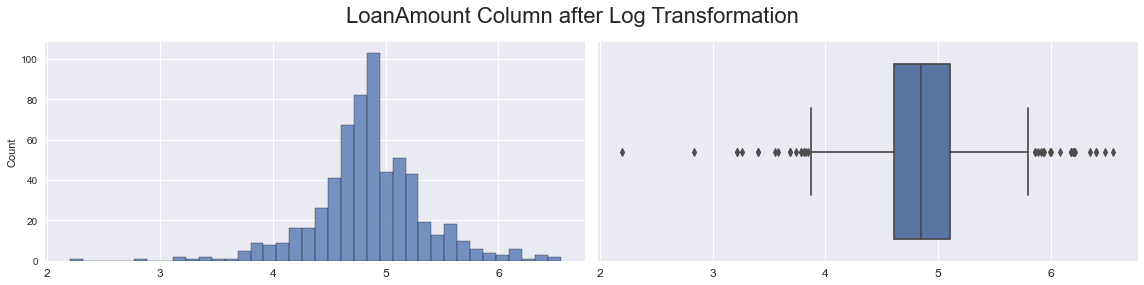

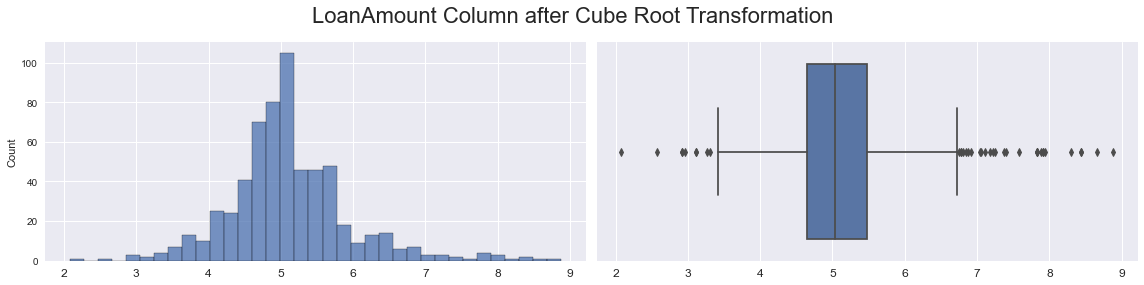

In [139]:
# LoanAmount 
col = 'LoanAmount'
plt.figure(figsize=(16,4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column", fontsize=22)
plt.tight_layout()
plt.show()


# log transformation
plt.figure(figsize=(16,4))
log_loanAmount = np.log(data[col])

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=log_loanAmount)
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=log_loanAmount)
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column after Log Transformation", fontsize=22)
plt.tight_layout()
plt.show()


# cube root transformation
plt.figure(figsize=(16,4))
cube_root_loanAmount = (data[col]) ** (1/3)

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=cube_root_loanAmount)
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=cube_root_loanAmount)
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column after Cube Root Transformation", fontsize=22)
plt.tight_layout()
plt.show()

LoanAmount outlier values can be handled by Cube Root Transfomration.

In [140]:
data['LoanAmount'] = cube_root_loanAmount
data['LoanAmount']

0      5.039684
1      5.039684
2      4.041240
3      4.932424
4      5.204828
         ...   
609    4.140818
610    3.419952
611    6.324704
612    5.718479
613    5.104469
Name: LoanAmount, Length: 614, dtype: float64

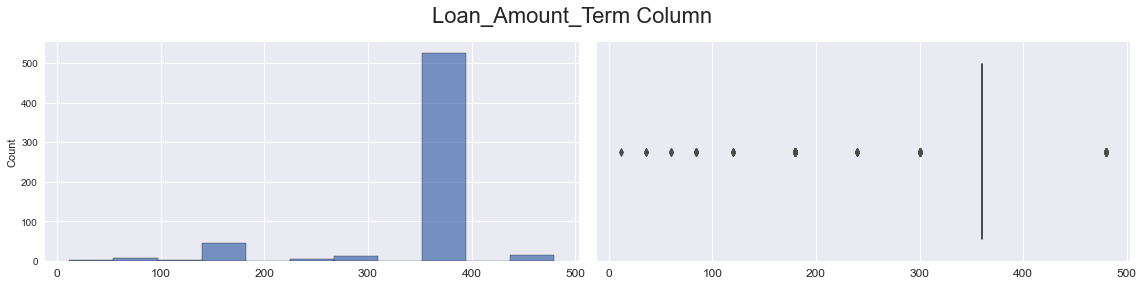

In [142]:
# Loan_Amount_Term 
col = 'Loan_Amount_Term'
plt.figure(figsize=(16,4))

# histogram
plt.subplot(1, 2, 1)
sns.histplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

# box plot 
plt.subplot(1, 2, 2)
sns.boxplot(x=data[col])
plt.xticks(fontsize=12)
plt.xlabel("")

plt.suptitle(col + " Column", fontsize=22)
plt.tight_layout()
plt.show()

Loan_Amount_Term outlier values can be standardized.

Credit_History contains only 0 and 1 so no need to change.

# **Training and Test Dataset**

In [154]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [158]:
data2 = pd.get_dummies(data)

In [159]:
X = data2.drop('Loan_Status', axis=1)
y = data['Loan_Status']

## **Scaling the Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()

In [219]:
X = scaler.fit_transform(X)

In [229]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.529372,0.215787,0.446745,0.706005,0.855049,0.182410,0.817590,0.346906,0.653094,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,0.336541,0.102560,0.205049,0.125708,0.137668,0.352339,0.386497,0.386497,0.476373,0.476373,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.469524,0.000000,0.377317,0.743590,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.514245,0.305530,0.435302,0.743590,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.580795,0.380602,0.500363,0.743590,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
X_train.shape, X_test.shape

((491, 17), (123, 17))

# **Bagging Classifier**

In [233]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [234]:
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1, random_state=42)

In [235]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=300,
                  n_jobs=-1, random_state=42)

In [236]:
y_pred_bc = bc.predict(X_test)

In [237]:
from sklearn.metrics import f1_score

In [238]:
print("F1 Score of Bagging Classifier :", f1_score(y_test, y_pred_bc))

F1 Score of Bagging Classifier : 0.8202247191011237


# **Random Forest Classifier**

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rfc = RandomForestClassifier(max_depth=16, n_estimators=500, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [241]:
y_pred_rfc = rfc.predict(X_test)
print("F1 Score of Random Forest Classifier :", f1_score(y_test, y_pred_rfc))

F1 Score of Random Forest Classifier : 0.8397790055248618


# **Gradient Boosting Classifier**

In [242]:
from sklearn.ensemble import GradientBoostingClassifier

In [243]:
gbc = GradientBoostingClassifier(n_estimators=400, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=400, random_state=42)

In [244]:
y_pred_gbc = gbc.predict(X_test)
print("F1 Score of Gradient Boosting Classifier :", f1_score(y_test, y_pred_gbc))

F1 Score of Gradient Boosting Classifier : 0.8314606741573034


# **AdaBoost Classifier**

In [245]:
from sklearn.ensemble import AdaBoostClassifier

In [246]:
abc = AdaBoostClassifier(n_estimators=300, random_state=42)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300, random_state=42)

In [247]:
y_pred_abc = abc.predict(X_test)
print("F1 Score of AdaBoost Classifier :", f1_score(y_test, y_pred_abc))

F1 Score of AdaBoost Classifier : 0.8070175438596491


# **GridSearchCV**

In [195]:
from sklearn.model_selection import GridSearchCV

## **Random Forest Classifier**

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rfc = RandomForestClassifier()

params_rfc = {'n_estimators': list(range(300,1100,100)),
             'max_depth': [8, 16, 32],           
             'max_features': ['log2', 'sqrt']}

grid_rfc = GridSearchCV(estimator=rfc,                        
                       param_grid=params_rfc,                         
                       cv=3,                        
                       scoring='accuracy',                        
                       verbose=1,                        
                       n_jobs=-1)

In [201]:
grid_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=16, n_estimators=500,
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [300, 400, 500, 600, 700, 800, 900,
                                          1000]},
             scoring='accuracy', verbose=1)

In [202]:
best_hyperparams = grid_rfc.best_params_
print("Best hyerparameters:\n", best_hyperparams)

best_CV_score = grid_rfc.best_score_ 
print(best_CV_score)

best_model = grid_rfc.best_estimator_

Best hyerparameters:
 {'max_depth': 32, 'max_features': 'log2', 'n_estimators': 300}
0.8085690059354581


In [210]:
y_pred = best_model.predict(X_test)
print("F1 Score of Random Forest Classifier :", f1_score(y_test, y_pred))

F1 Score of Random Forest Classifier : 0.8397790055248618


## **Gradient Boosting Classifier**

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
gbc = GradientBoostingClassifier()

params_gbc = {'n_estimators': list(range(300,1100,100)),       
             'max_features': ['log2', 'sqrt']}

grid_gbc = GridSearchCV(estimator=gbc,                        
                       param_grid=params_gbc,                         
                       cv=3,                        
                       scoring='accuracy',                        
                       verbose=1,                        
                       n_jobs=-1)

In [209]:
grid_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [300, 400, 500, 600, 700, 800, 900,
                                          1000]},
             scoring='accuracy', verbose=1)

In [211]:
best_hyperparams = grid_gbc.best_params_
print("Best hyerparameters:\n", best_hyperparams)

best_CV_score = grid_gbc.best_score_ 
print(best_CV_score)

best_model = grid_gbc.best_estimator_
y_pred = best_model.predict(X_test)
print("F1 Score of Gradient Boosting Classifier :", f1_score(y_test, y_pred))

Best hyerparameters:
 {'max_features': 'sqrt', 'n_estimators': 300}
0.7820714250087287
F1 Score of Gradient Boosting Classifier : 0.8314606741573034


## **AdaBoost Classifier**

In [212]:
from sklearn.ensemble import AdaBoostClassifier

In [215]:
abc = AdaBoostClassifier()

params_abc = {'n_estimators': list(range(300,1100,100))}

grid_abc = GridSearchCV(estimator=abc,                        
                       param_grid=params_abc,                         
                       cv=3,                        
                       scoring='accuracy',                        
                       verbose=1,                        
                       n_jobs=-1)

In [216]:
grid_abc.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [300, 400, 500, 600, 700, 800, 900,
                                          1000]},
             scoring='accuracy', verbose=1)

In [217]:
best_hyperparams = grid_abc.best_params_
print("Best hyerparameters:\n", best_hyperparams)

best_CV_score = grid_abc.best_score_ 
print(best_CV_score)

best_model = grid_abc.best_estimator_
y_pred = best_model.predict(X_test)
print("F1 Score of AdaBoost Classifier :", f1_score(y_test, y_pred))

Best hyerparameters:
 {'n_estimators': 700}
0.7373684473041049
F1 Score of AdaBoost Classifier : 0.7861271676300579
